# API Requests - Stock Market data
Alpha Vantage API - https://rapidapi.com/alphavantage/api/alpha-vantage

# Load the api key in python variable

In [2]:
import streamlit as st

api_key = st.secrets["API_KEY"]

# Symbol Search

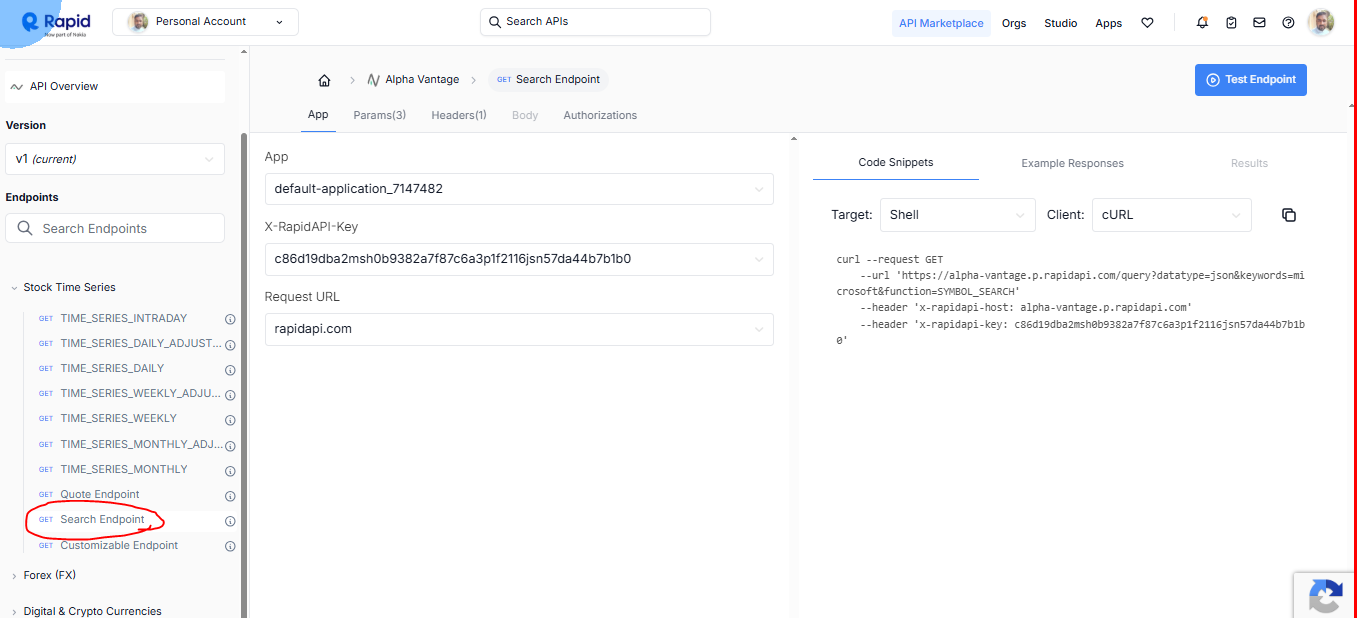

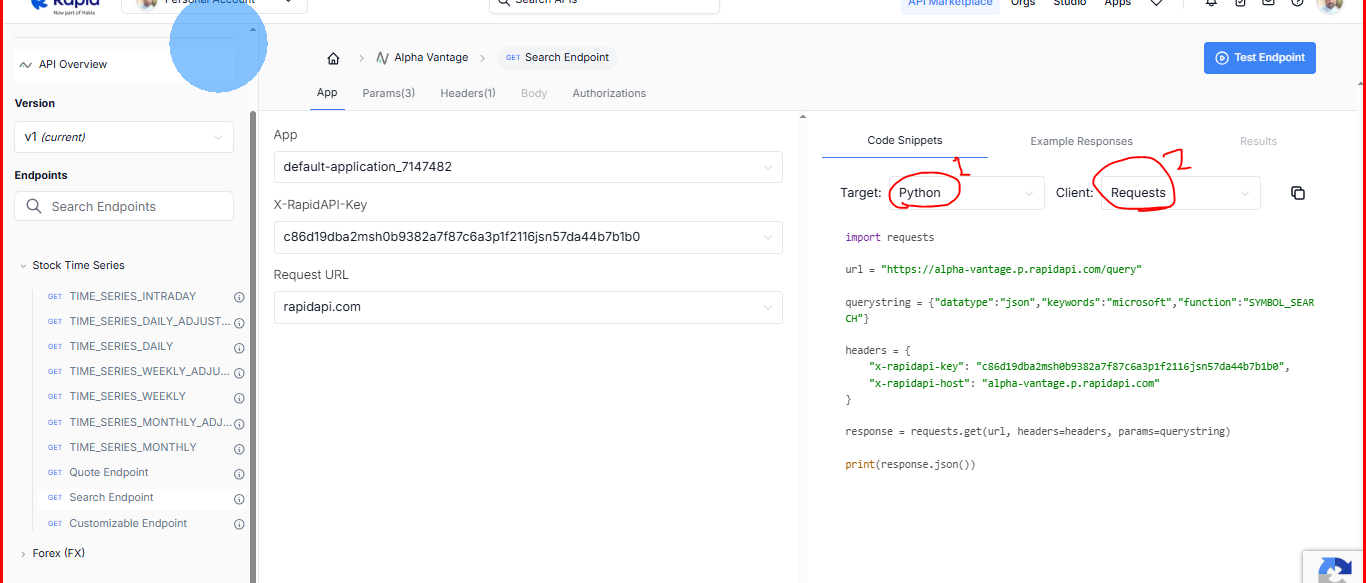

In [3]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

company = "State Bank of India"

querystring = {"datatype": "json", "keywords": company, "function": "SYMBOL_SEARCH"}

headers = {
    "x-rapidapi-key": st.secrets["API_KEY"],
    "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'bestMatches': [{'1. symbol': 'SBIN.BSE', '2. name': 'State Bank of India', '3. type': 'Equity', '4. region': 'India/Bombay', '5. marketOpen': '09:15', '6. marketClose': '15:30', '7. timezone': 'UTC+5.5', '8. currency': 'INR', '9. matchScore': '1.0000'}, {'1. symbol': 'SBKFF', '2. name': 'State Bank of India', '3. type': 'Equity', '4. region': 'United States', '5. marketOpen': '09:30', '6. marketClose': '16:00', '7. timezone': 'UTC-04', '8. currency': 'USD', '9. matchScore': '1.0000'}, {'1. symbol': 'SID.FRK', '2. name': 'State Bank of India', '3. type': 'Equity', '4. region': 'Frankfurt', '5. marketOpen': '08:00', '6. marketClose': '20:00', '7. timezone': 'UTC+02', '8. currency': 'EUR', '9. matchScore': '1.0000'}, {'1. symbol': 'SBID.LON', '2. name': 'State Bank of India GDR', '3. type': 'Equity', '4. region': 'United Kingdom', '5. marketOpen': '08:00', '6. marketClose': '16:30', '7. timezone': 'UTC+01', '8. currency': 'USD', '9. matchScore': '0.9048'}]}


In [4]:
import pandas as pd

data = response.json()["bestMatches"]
search = pd.DataFrame(data)
search

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,SBIN.BSE,State Bank of India,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,1.0000
1,SBKFF,State Bank of India,Equity,United States,09:30,16:00,UTC-04,USD,1.0000
2,SID.FRK,State Bank of India,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,1.0000
3,SBID.LON,State Bank of India GDR,Equity,United Kingdom,08:00,16:30,UTC+01,USD,0.9048


# Daily stock data for SBIN.BSE

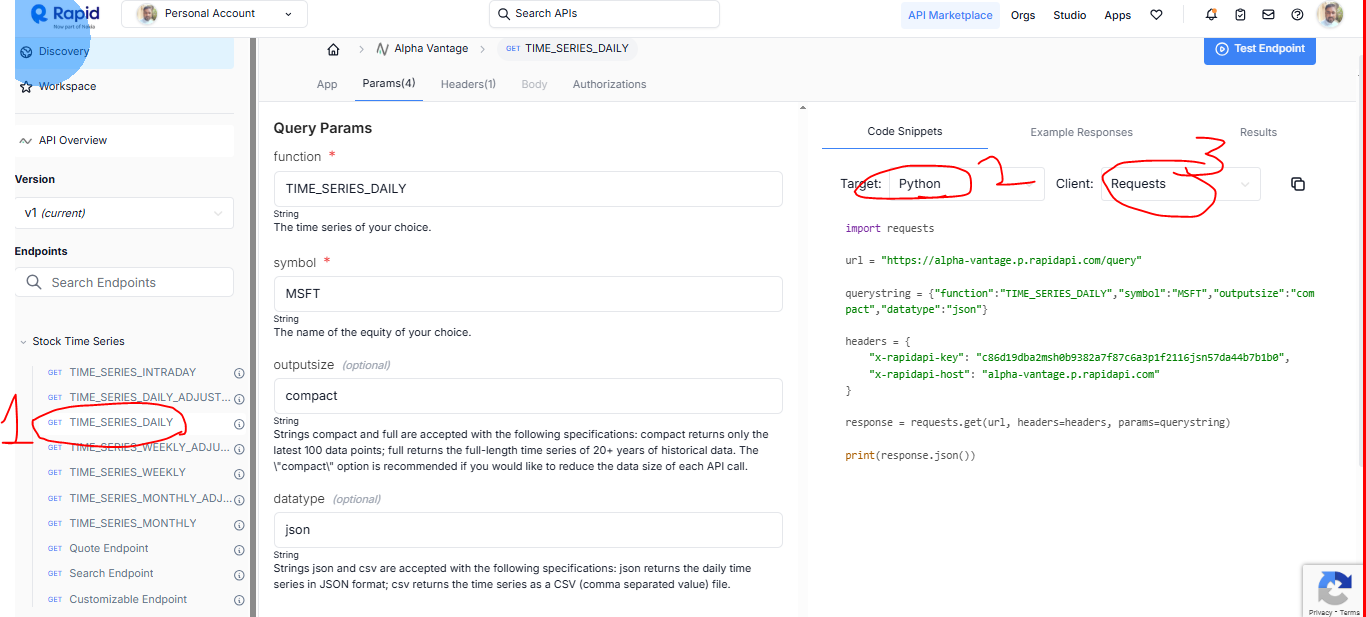

In [5]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

symbol = "SBIN.BSE"

querystring = {
    "function": "TIME_SERIES_DAILY",
    "symbol": symbol,
    "outputsize": "compact",
    "datatype": "json",
}

headers = {
    "x-rapidapi-key": st.secrets["API_KEY"],
    "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'SBIN.BSE', '3. Last Refreshed': '2025-09-19', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-09-19': {'1. open': '852.5000', '2. high': '863.5000', '3. low': '849.0500', '4. close': '862.2500', '5. volume': '552336'}, '2025-09-18': {'1. open': '856.7000', '2. high': '860.9000', '3. low': '851.0500', '4. close': '854.4500', '5. volume': '719272'}, '2025-09-17': {'1. open': '833.2500', '2. high': '858.0000', '3. low': '831.0000', '4. close': '856.9500', '5. volume': '1807341'}, '2025-09-16': {'1. open': '823.4000', '2. high': '833.0000', '3. low': '821.6000', '4. close': '831.8000', '5. volume': '368364'}, '2025-09-15': {'1. open': '823.3000', '2. high': '828.0000', '3. low': '821.4000', '4. close': '824.9000', '5. volume': '139666'}, '2025-09-12': {'1. open': '824.9000', '2. high': '825.3500', '3. low': '819.9000', '4. close': '823.3000', '5. vol

In [6]:
response.json().keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [8]:
data = response.json()["Time Series (Daily)"]
df_sbin = pd.DataFrame(data).T
df_sbin

,1. open,2. high,3. low,4. close,5. volume
2025-09-19,852.5000,863.5000,849.0500,862.2500,552336
2025-09-18,856.7000,860.9000,851.0500,854.4500,719272
2025-09-17,833.2500,858.0000,831.0000,856.9500,1807341
2025-09-16,823.4000,833.0000,821.6000,831.8000,368364
2025-09-15,823.3000,828.0000,821.4000,824.9000,139666
...,...,...,...,...,...
2025-05-07,762.2500,782.5500,762.2500,776.1500,581175
2025-05-06,792.2000,799.0000,771.1500,774.1500,761282
2025-05-05,784.9500,799.1000,783.6500,790.0000,771587
2025-05-02,792.0500,802.9500,789.2500,800.0500,335006


In [9]:
df_sbin.dtypes

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

In [10]:
df_sbin = df_sbin.astype(float).round(2)
df_sbin

,1. open,2. high,3. low,4. close,5. volume
2025-09-19,852.50,863.50,849.05,862.25,552336.0
2025-09-18,856.70,860.90,851.05,854.45,719272.0
2025-09-17,833.25,858.00,831.00,856.95,1807341.0
2025-09-16,823.40,833.00,821.60,831.80,368364.0
2025-09-15,823.30,828.00,821.40,824.90,139666.0
...,...,...,...,...,...
2025-05-07,762.25,782.55,762.25,776.15,581175.0
2025-05-06,792.20,799.00,771.15,774.15,761282.0
2025-05-05,784.95,799.10,783.65,790.00,771587.0
2025-05-02,792.05,802.95,789.25,800.05,335006.0


In [11]:
df_sbin.index

Index(['2025-09-19', '2025-09-18', '2025-09-17', '2025-09-16', '2025-09-15',
       '2025-09-12', '2025-09-11', '2025-09-10', '2025-09-09', '2025-09-08',
       '2025-09-05', '2025-09-04', '2025-09-03', '2025-09-02', '2025-09-01',
       '2025-08-29', '2025-08-28', '2025-08-26', '2025-08-25', '2025-08-22',
       '2025-08-21', '2025-08-20', '2025-08-19', '2025-08-18', '2025-08-14',
       '2025-08-13', '2025-08-12', '2025-08-11', '2025-08-08', '2025-08-07',
       '2025-08-06', '2025-08-05', '2025-08-04', '2025-08-01', '2025-07-31',
       '2025-07-30', '2025-07-29', '2025-07-28', '2025-07-25', '2025-07-24',
       '2025-07-23', '2025-07-22', '2025-07-21', '2025-07-18', '2025-07-17',
       '2025-07-16', '2025-07-15', '2025-07-14', '2025-07-11', '2025-07-10',
       '2025-07-09', '2025-07-08', '2025-07-07', '2025-07-04', '2025-07-03',
       '2025-07-02', '2025-07-01', '2025-06-30', '2025-06-27', '2025-06-26',
       '2025-06-25', '2025-06-24', '2025-06-23', '2025-06-20', '2025-06-19',

In [12]:
# Convert index to datetime type
df_sbin.index = pd.to_datetime(df_sbin.index)
# name the index as date
df_sbin.index.name = "date"
df_sbin.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-09-19,852.50,863.5,849.05,862.25,552336.0
2025-09-18,856.70,860.9,851.05,854.45,719272.0
2025-09-17,833.25,858.0,831.00,856.95,1807341.0
2025-09-16,823.40,833.0,821.60,831.80,368364.0
2025-09-15,823.30,828.0,821.40,824.90,139666.0


In [13]:
# save to csv
df_sbin.to_csv("sbin.csv")

# Plot above chart as candlestick

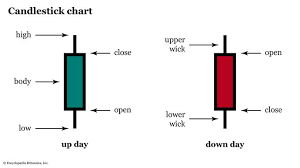

In [16]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Candlestick(
            x=df_sbin.index,
            open=df_sbin["1. open"],
            high=df_sbin["2. high"],
            low=df_sbin["3. low"],
            close=df_sbin["4. close"],
        )
    ]
)

fig.update_layout(width=1200, height=800)

fig.show()

# Create a class to get data for any company

In [5]:
import requests
import streamlit as st
import pandas as pd
import plotly.graph_objects as go


class StockClient:

    def __init__(self):
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        self.headers = {
            "x-rapidapi-key": st.secrets["API_KEY"],
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
        }

    def get_symbols(self, company: str) -> pd.DataFrame:
        querystring = {
            "datatype": "json",
            "keywords": company,
            "function": "SYMBOL_SEARCH",
        }
        response = requests.get(url=self.url, headers=self.headers, params=querystring)
        response.raise_for_status()  # Throws an error if response not fetched
        data = response.json()["bestMatches"]
        df_search = pd.DataFrame(data)
        return df_search

    def get_daily_data(self, symbol: str) -> pd.DataFrame:
        querystring = {
            "function": "TIME_SERIES_DAILY",
            "symbol": symbol,
            "outputsize": "compact",
            "datatype": "json",
        }
        response = requests.get(url=self.url, headers=self.headers, params=querystring)
        response.raise_for_status()
        data = response.json()["Time Series (Daily)"]
        df_stock = pd.DataFrame(data).T
        df_stock = df_stock.astype(float).round(2)
        df_stock.index = pd.to_datetime(df_stock.index)
        df_stock.index.name = "Date"
        return df_stock

    def get_candlestick_chart(self, df: pd.DataFrame) -> go.Figure:
        fig = go.Figure(
            data=[
                go.Candlestick(
                    x=df.index,
                    open=df["1. open"],
                    high=df["2. high"],
                    low=df["3. low"],
                    close=df["4. close"],
                )
            ]
        )
        fig.update_layout(width=1200, height=800)
        return fig

# Intialize stock client

In [6]:
client = StockClient()
print(type(client))

<class '__main__.StockClient'>


In [7]:
# Get the company symbol for Godrej

symbols_df = client.get_symbols(company="Godrej")
symbols_df

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,GODREJCP.BSE,GODREJ CONSUMER PRODUCTS LTD.,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.7059
1,GODREJIND.BSE,GODREJ INDUSTRIES LTD.,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.6667
2,GODREJAGRO.BSE,Godrej Agrovet Ltd,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.6316
3,GODREJPROP.BSE,Godrej Properties Ltd,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.6316
4,540743.BSE,Godrej Agrovet Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.4286
5,532424.BSE,Godrej Consumer Products Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.3158


In [8]:
# get stock data for GODREJIND.BSE

df_godrej = client.get_daily_data(symbol="GODREJIND.BSE")
df_godrej

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-09-19,1217.35,1220.60,1161.10,1177.65,11116.0
2025-09-18,1202.70,1235.50,1202.70,1217.40,2927.0
2025-09-17,1223.00,1225.00,1195.00,1217.05,8410.0
2025-09-16,1255.95,1255.95,1217.70,1222.90,3132.0
2025-09-15,1210.00,1266.45,1209.10,1243.25,10204.0
...,...,...,...,...,...
2025-05-08,1134.85,1134.85,1104.10,1110.30,3099.0
2025-05-07,1129.95,1130.45,1084.65,1124.40,5061.0
2025-05-06,1071.85,1115.00,1071.85,1111.95,3787.0


In [9]:
df_godrej.to_csv("godrej.csv")

In [11]:
# plot chart

fig = client.get_candlestick_chart(df_godrej)
fig.show()

## Show above details for tesla

In [12]:
client.get_symbols("Tesla")

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,TSLA,Tesla Inc,Equity,United States,09:30,16:00,UTC-04,USD,0.8889
1,TL0.DEX,Tesla Inc,Equity,XETRA,08:00,20:00,UTC+02,EUR,0.7143
2,TL0.FRK,Tesla Inc,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.7143
3,TSLA34.SAO,Tesla Inc,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.7143
4,TSLA.TRT,Tesla CDR (CAD Hedged),Equity,Toronto,09:30,16:00,UTC-05,CAD,0.6667
5,TL01.FRK,TESLA INC. CDR DL-001,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.3846


In [13]:
df_tsla = client.get_daily_data(symbol="TSLA")
df_tsla

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-09-19,421.82,429.47,421.72,426.07,93131034.0
2025-09-18,428.86,432.22,416.56,416.85,90454509.0
2025-09-17,415.75,428.31,409.67,425.86,106133532.0
2025-09-16,414.50,423.25,411.43,421.62,104285721.0
2025-09-15,423.13,425.70,402.43,410.04,163823667.0
...,...,...,...,...,...
2025-05-05,284.57,284.85,274.40,280.26,94618882.0
2025-05-02,284.90,294.78,279.81,287.21,114454683.0
2025-05-01,280.01,290.87,279.81,280.52,99658974.0


In [14]:
client.get_candlestick_chart(df_tsla)